In [2]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import cmcrameri.cm as cmcm
from glob import glob

In [16]:
fits_filenames = glob("../src/eis/level1/eis_l1_*.fits")
fits_filenames = sorted(fits_filenames)

In [22]:
fits_filenames

['../src/eis/level1/eis_l1_20070331_113427.fits',
 '../src/eis/level1/eis_l1_20070331_121143.fits',
 '../src/eis/level1/eis_l1_20070331_124913.fits',
 '../src/eis/level1/eis_l1_20070331_132643.fits',
 '../src/eis/level1/eis_l1_20070331_153013.fits',
 '../src/eis/level1/eis_l1_20070331_160743.fits',
 '../src/eis/level1/eis_l1_20070331_164513.fits',
 '../src/eis/level1/eis_l1_20070331_172243.fits',
 '../src/eis/level1/eis_l1_20070331_182413.fits',
 '../src/eis/level1/eis_l1_20070331_190143.fits',
 '../src/eis/level1/eis_l1_20070331_195513.fits',
 '../src/eis/level1/eis_l1_20070331_203243.fits',
 '../src/eis/level1/eis_l1_20070331_213213.fits',
 '../src/eis/level1/eis_l1_20070331_220943.fits',
 '../src/eis/level1/eis_l1_20070331_230743.fits']

In [20]:
with fits.open(fits_filenames[-1]) as hdul:
    hdul.info()
hdul[0].header

Filename: ../src/eis/level1/eis_l1_20070331_230743.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     133   ()      
  1  DATA          1 BinTableHDU    287   7R x 20C   [524288E, 524288E, 524288E, 524288E, 1D, 1D, 1D, 1D, 1I, 1I, 1B, 1B, 1B, 1J, 1J, 1I, 1E, 1E, 1E, 1E]   


SIMPLE  =                    T /Written by IDL:  Sat Apr  7 03:58:51 2007       
BITPIX  =                    8 /                                                
NAXIS   =                    0 /                                                
NAXIS1  =              8388673 / Number of bytes per row                        
EXTEND  =                    T /File contains extensions                        
DATE    = '2007-04-06'         /                                                
ORIGIN  = 'ISAS    '           /Institute where FITS file was written           
DATA_LEV=                    1 / FITS Level (0, 1, 2)                           
DATE_RF0= '2007-04-06T18:58:51.770' /Date and time of Level 0 reformat          
ORIG_RF0= 'ISAS    '           /Institution where Level 0 reformat was done     
VER_RF0 = 'EIS_Lev0_Reformatter Ver 1.17' /Fits Level 0 reformatter version no. 
DATE_RF1= '2022-04-05T17:09:26.663' / Date and time of Level 1 reformat         
ORIG_RF1= 'ITA-UiO '        

In [24]:
for ii, filename in enumerate(fits_filenames):
    with fits.open(filename) as hdul:
        hdr = hdul[0].header
        print(hdr["XCEN"])
        print(hdr["DATE_OBS"])


490.88119
2007-03-31T11:34:27.000
483.77013
2007-03-31T12:11:43.000
476.40924
2007-03-31T12:49:13.000
469.34969
2007-03-31T13:26:43.000
445.71546
2007-03-31T15:30:13.000
438.61718
2007-03-31T16:07:43.000
431.4499
2007-03-31T16:45:13.000
423.29904
2007-03-31T17:22:43.000
411.35138
2007-03-31T18:24:13.000
404.24599
2007-03-31T19:01:43.000
393.48068
2007-03-31T19:55:13.000
386.2997
2007-03-31T20:32:43.000
374.74137
2007-03-31T21:32:13.000
367.53506
2007-03-31T22:09:43.000
355.86241
2007-03-31T23:07:43.000


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  after removing the cwd from sys.path.


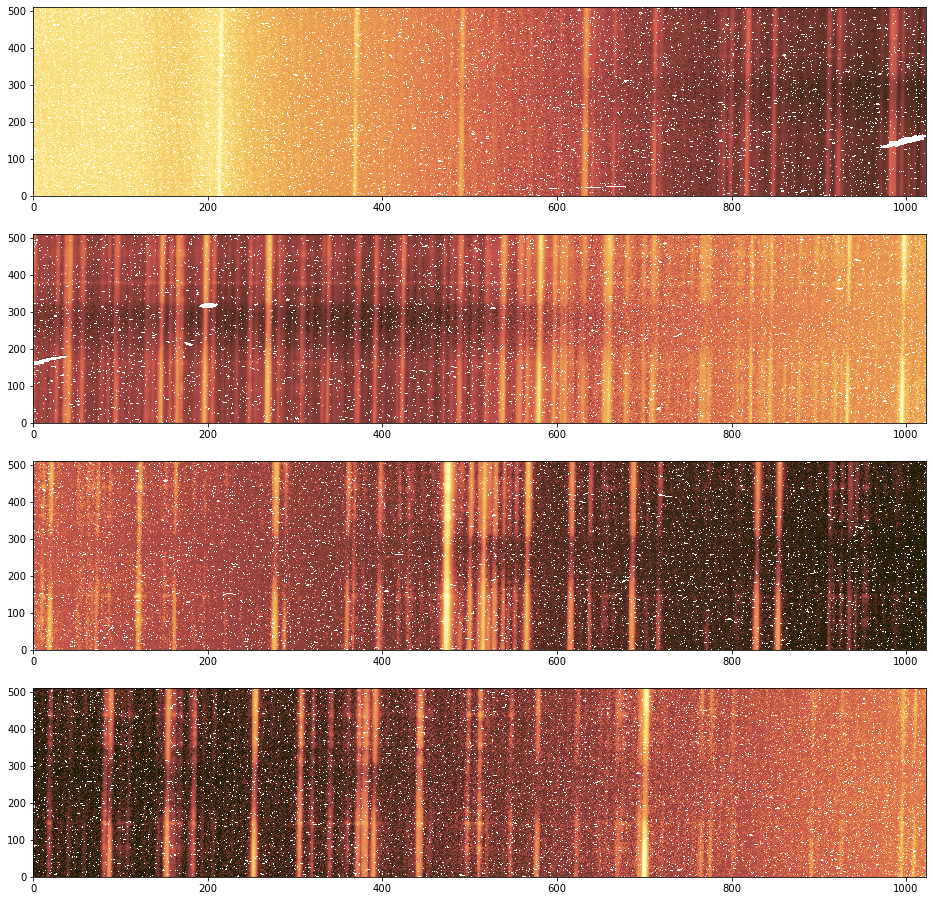

In [21]:
fig, axes = plt.subplots(4,1,figsize=(16,16))

for ii, ax_ in enumerate(axes):
    ax_.pcolormesh(np.arange(1024),np.arange(512),np.log10(eis_data[0][ii]),cmap=cmcm.lajolla_r)